[**********************80%%************          ]  12 of 15 completed

監測的市場和指標:

美國股市:
  - ^GSPC: 標準普爾500指數
  - ^IXIC: 納斯達克綜合指數
  - ^DJI: 道瓊斯工業平均指數

歐洲股市:
  - ^FTSE: 英國富時100指數
  - ^GDAXI: 德國DAX指數
  - ^FCHI: 法國CAC 40指數

亞洲股市:
  - ^N225: 日經225指數
  - 000001.SS: 上證綜指
  - ^HSI: 香港恆生指數
  - ^TWII: 台灣加權指數

商品期貨:
  - GC=F: 黃金期貨
  - CL=F: 原油期貨

外匯市場:
  - EURUSD=X: 歐元/美元
  - JPYUSD=X: 日元/美元
  - GBPUSD=X: 英鎊/美元
請求資料的日期範圍: 2024-04-27 到 2024-07-26


[*********************100%%**********************]  15 of 15 completed
C:\Users\myuser\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


獲取到的資料範圍: 2024-04-29 00:00:00 到 2024-07-25 00:00:00

警告：以下指標存在缺失資料：
  000001.SS: 4 個缺失值
  CL=F: 3 個缺失值
  EURUSD=X: 1 個缺失值
  GBPUSD=X: 1 個缺失值
  GC=F: 3 個缺失值
  JPYUSD=X: 1 個缺失值
  ^DJI: 3 個缺失值
  ^FCHI: 1 個缺失值
  ^FTSE: 2 個缺失值
  ^GDAXI: 1 個缺失值
  ^GSPC: 3 個缺失值
  ^HSI: 4 個缺失值
  ^IXIC: 3 個缺失值
  ^N225: 4 個缺失值
  ^TWII: 4 個缺失值

最新風險評分:
            000001.SS  CL=F  EURUSD=X  GBPUSD=X  GC=F  JPYUSD=X  ^DJI  ^FCHI  \
Date                                                                           
2024-07-19          0     0         0         0     0         0     0      0   
2024-07-22          1     1         1         1     1         1     1      1   
2024-07-23          0     0         0         0     0         0     0      0   
2024-07-24          0     0         0         0     0         0     0      0   
2024-07-25          1     1         1         1     1         1     1      1   

            ^FTSE  ^GDAXI  ^GSPC  ^HSI  ^IXIC  ^N225  ^TWII  
Date                                              

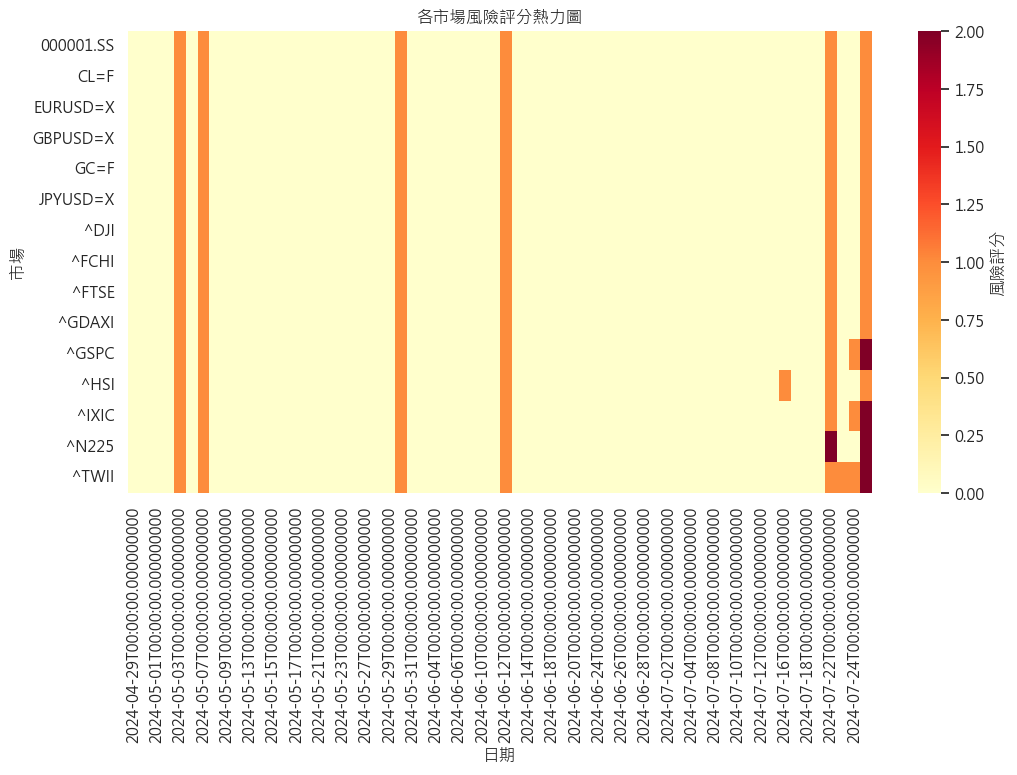

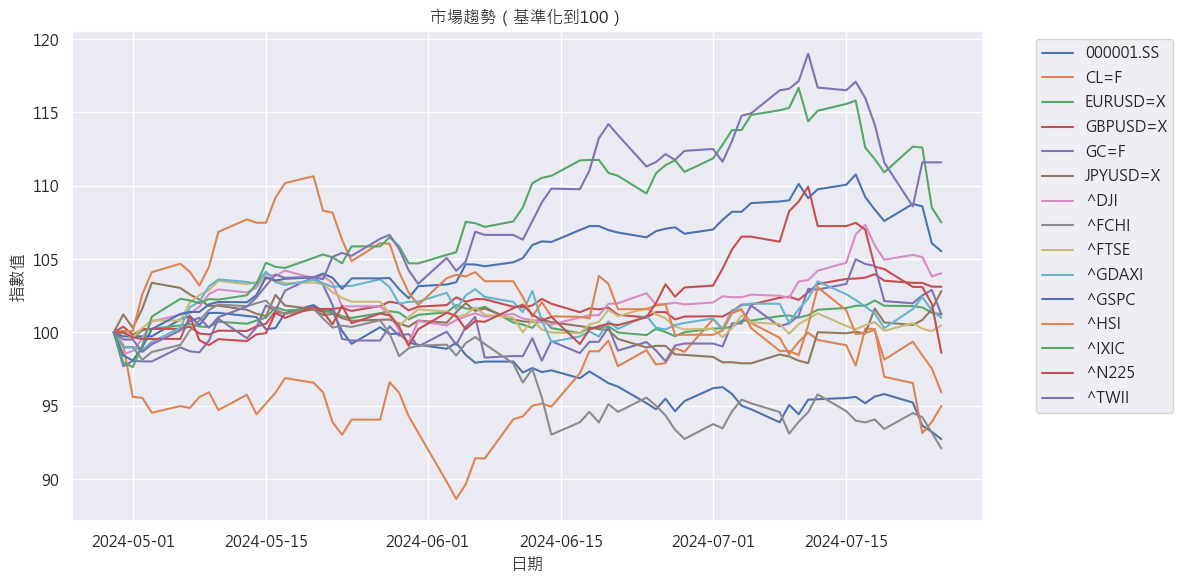

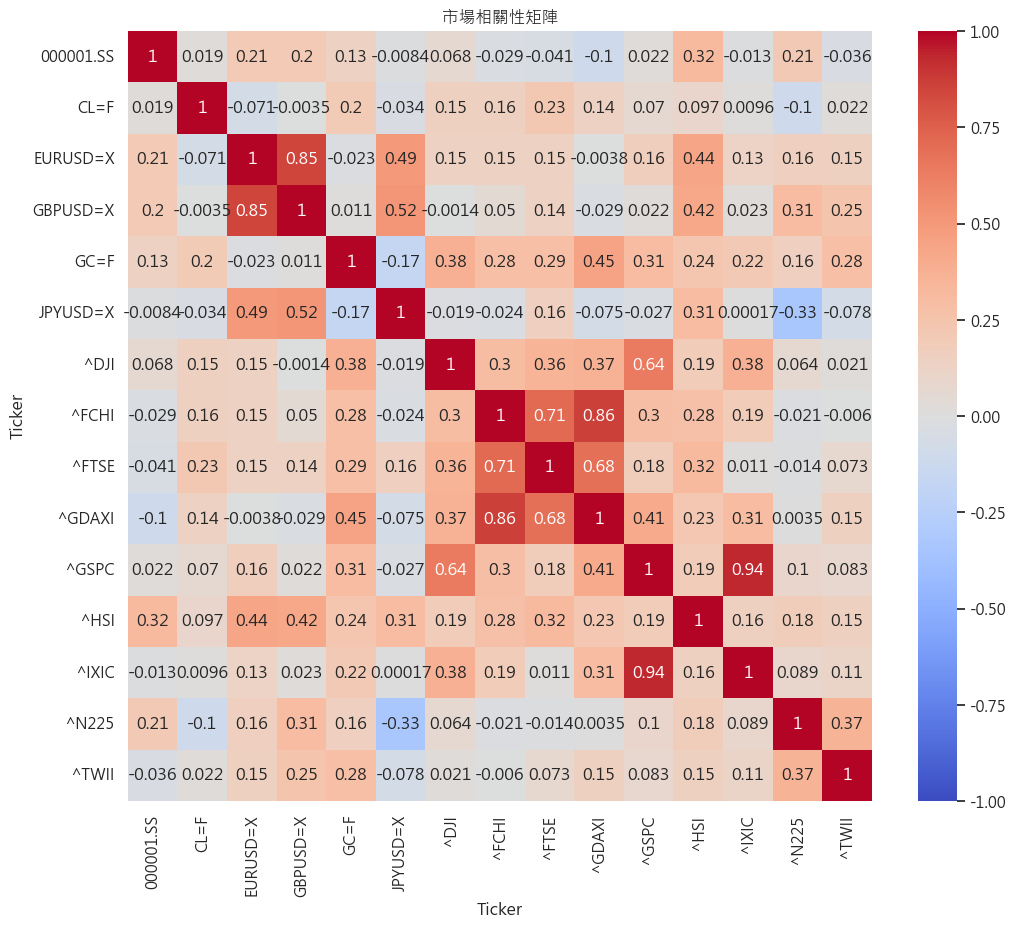

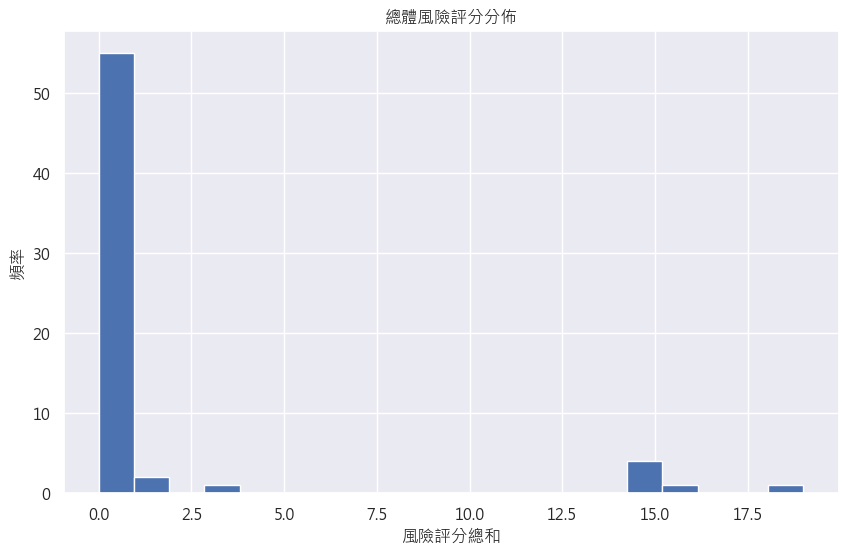


最新市場狀態:
Date
2024-07-19    2
2024-07-22    2
2024-07-23    2
2024-07-24    2
2024-07-25    2
Freq: B, dtype: int32

資料統計:
Ticker    000001.SS       CL=F   EURUSD=X   GBPUSD=X         GC=F   JPYUSD=X  \
count     64.000000  64.000000  64.000000  64.000000    64.000000  64.000000   
mean    3042.653519  79.654063   1.080188   1.272133  2353.653114   0.006352   
std       78.832012   2.444972   0.007003   0.013261    43.089299   0.000088   
min     2886.741943  73.250000   1.066655   1.249016  2291.399902   0.006187   
25%     2972.217407  78.087500   1.074059   1.264574  2322.974976   0.006316   
50%     3035.050537  79.260002   1.080725   1.271851  2341.599976   0.006366   
75%     3111.524292  81.657497   1.086109   1.279365  2382.125000   0.006414   
max     3171.145020  83.879997   1.094020   1.300745  2462.399902   0.006534   

Ticker          ^DJI        ^FCHI        ^FTSE        ^GDAXI        ^GSPC  \
count      64.000000    64.000000    64.000000     64.000000    64.000000   
me

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# 設置微軟正黑體
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False  # 解決負號顯示問題
def visualize_risk_scores(risk_score):
    plt.figure(figsize=(12, 6))
    sns.heatmap(risk_score.T, cmap='YlOrRd', cbar_kws={'label': '風險評分'})
    plt.title('各市場風險評分熱力圖')
    plt.xlabel('日期')
    plt.ylabel('市場')
    plt.show()

def plot_market_trends(market_data):
    plt.figure(figsize=(12, 6))
    for column in market_data.columns:
        plt.plot(market_data.index, market_data[column] / market_data[column].iloc[0] * 100, label=column)
    plt.title('市場趨勢（基準化到100）')
    plt.xlabel('日期')
    plt.ylabel('指數值')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

def plot_correlation_matrix(market_data):
    correlation = market_data.pct_change().corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title('市場相關性矩陣')
    plt.show()

def plot_risk_score_distribution(risk_score):
    plt.figure(figsize=(10, 6))
    risk_score.sum(axis=1).hist(bins=20)
    plt.title('總體風險評分分佈')
    plt.xlabel('風險評分總和')
    plt.ylabel('頻率')
    plt.show()
    
def get_date_range():
    end_date = datetime.now().date()
    start_date = end_date - timedelta(days=90)  # 使用過去90天的資料
    return start_date, end_date

def calculate_volatility(data, window=20):
    return data.pct_change().rolling(window=window).std() * np.sqrt(252)

def detect_anomalies(data, threshold=3):
    if data.empty:
        return pd.Series(dtype=bool)
    data_filled = data.fillna(method='ffill').fillna(method='bfill')
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(data_filled)
    pca = PCA(n_components=0.95)
    pca_result = pca.fit_transform(normalized_data)
    reconstruction = pca.inverse_transform(pca_result)
    mse = np.mean(np.power(normalized_data - reconstruction, 2), axis=1)
    return pd.Series(mse > threshold * np.std(mse), index=data.index)

def cluster_market_states(data, n_clusters=5):
    if data.empty:
        return pd.Series(dtype=int)
    data_filled = data.fillna(method='ffill').fillna(method='bfill')
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    return pd.Series(kmeans.fit_predict(data_filled), index=data.index)

def calculate_risk_score(market_data):
    volatility = calculate_volatility(market_data)
    anomalies = detect_anomalies(market_data)
    
    common_index = volatility.index.intersection(anomalies.index)
    volatility = volatility.loc[common_index]
    anomalies = anomalies.loc[common_index]
    
    risk_score = pd.DataFrame(index=common_index)
    for column in market_data.columns:
        vol_threshold = volatility[column].mean() + 2 * volatility[column].std()
        risk_score[column] = anomalies.astype(int) + (volatility[column] > vol_threshold).astype(int)
    
    return risk_score

def classify_markets(symbols):
    classifications = {
        '美國股市': ['^GSPC', '^IXIC', '^DJI'],
        '歐洲股市': ['^FTSE', '^GDAXI', '^FCHI'],
        '亞洲股市': ['^N225', '000001.SS', '^HSI', '^TWII'],
        '商品期貨': ['GC=F', 'CL=F'],
        '外匯市場': ['EURUSD=X', 'JPYUSD=X', 'GBPUSD=X']
    }
    
    for market, symbols_list in classifications.items():
        print(f"\n{market}:")
        for symbol in symbols_list:
            if symbol in symbols:
                name = get_market_name(symbol)
                print(f"  - {symbol}: {name}")

def get_market_name(symbol):
    names = {
        '^GSPC': '標準普爾500指數',
        '^IXIC': '納斯達克綜合指數',
        '^DJI': '道瓊斯工業平均指數',
        '^FTSE': '英國富時100指數',
        '^GDAXI': '德國DAX指數',
        '^FCHI': '法國CAC 40指數',
        '^N225': '日經225指數',
        '000001.SS': '上證綜指',
        '^HSI': '香港恆生指數',
        '^TWII': '台灣加權指數',
        'GC=F': '黃金期貨',
        'CL=F': '原油期貨',
        'EURUSD=X': '歐元/美元',
        'JPYUSD=X': '日元/美元',
        'GBPUSD=X': '英鎊/美元'
    }
    return names.get(symbol, '未知')

def monitor_market_risks(symbols):
    start_date, end_date = get_date_range()
    print(f"請求資料的日期範圍: {start_date} 到 {end_date}")
    
    market_data = yf.download(symbols, start=start_date, end=end_date)['Close']
    print(f"獲取到的資料範圍: {market_data.index[0]} 到 {market_data.index[-1]}")
    
    if market_data.empty:
        raise ValueError("未能獲取到任何資料")
    
    if market_data.index[-1].date() < end_date - timedelta(days=5):
        print(f"警告：最新的資料日期 ({market_data.index[-1].date()}) 距離當前日期超過5天")
    
    # 檢查並報告缺失值
    missing_data = market_data.isnull().sum()
    if missing_data.any():
        print("\n警告：以下指標存在缺失資料：")
        for symbol, count in missing_data[missing_data > 0].items():
            print(f"  {symbol}: {count} 個缺失值")
    
    market_data = market_data.fillna(method='ffill').fillna(method='bfill')
    
    risk_score = calculate_risk_score(market_data)
    market_states = cluster_market_states(market_data)
    
    return risk_score, market_states, market_data

def explain_risk_score(risk_score):
    explanations = {
        0: "低風險：市場表現正常，波動性低於平均水平。",
        1: "中等風險：市場出現一些異常波動或波動性略高於平均水平。需要密切關注。",
        2: "高風險：市場出現顯著異常或波動性大幅高於平均水平。建議採取風險管理措施。"
    }
    
    print("\n風險評分解釋：")
    for score in range(3):
        print(f"{score}: {explanations[score]}")
    
    print("\n各市場最新風險狀況：")
    latest_scores = risk_score.iloc[-1]
    for market, score in latest_scores.items():
        print(f"{market}: {explanations[score]}")
    
    high_risk_markets = latest_scores[latest_scores == 2].index.tolist()
    if high_risk_markets:
        print(f"\n特別注意：以下市場處於高風險狀態：{', '.join(high_risk_markets)}")
    
    return high_risk_markets

# 主程序
# 更新 symbols 列表
symbols = [
    # 美國市場
    '^GSPC', '^IXIC', '^DJI',
    # 歐洲市場
    '^FTSE', '^GDAXI', '^FCHI',
    # 亞洲市場
    '^N225',  # 日經225指數
    '000001.SS',  # 上證綜指
    '^HSI',  # 香港恆生指數
    '^TWII',  # 台灣加權指數
    # 全球商品
    'GC=F', 'CL=F',
    # 主要貨幣對
    'EURUSD=X', 'JPYUSD=X', 'GBPUSD=X'
]



try:
    
    print("監測的市場和指標:")
    classify_markets(symbols)
    
    risk_score, market_states, market_data = monitor_market_risks(symbols)

    print("\n最新風險評分:")
    print(risk_score.tail())
    
    high_risk_markets = explain_risk_score(risk_score)
    
    # 可視化部分
    visualize_risk_scores(risk_score)
    plot_market_trends(market_data)
    plot_correlation_matrix(market_data)
    plot_risk_score_distribution(risk_score)
    
    print("\n最新市場狀態:")
    print(market_states.tail())
    
    print("\n資料統計:")
    print(market_data.describe())
    
    print("\n缺失值數量:")
    print(market_data.isnull().sum())
    
    print("\n最新市場資料:")
    print(market_data.tail())

    if high_risk_markets:
        print("\n建議行動：")
        print("1. 密切監控高風險市場的變化。")
        print("2. 考慮調整投資組合，可能需要減少在高風險市場的敞口。")
        print("3. 評估是否需要採取對沖策略來保護投資。")
        print("4. 關注可能影響這些市場的宏觀經濟和地緣政治因素。")
    else:
        print("\n整體市場風險相對較低，但仍需保持警惕，持續監控市場變化。")
except Exception as e:
    print(f"發生錯誤: {e}")
    print("請檢查資料是否正確載入，以及所有計算是否基於相同的時間序列。")

print("\n注意：如果您看到的資料日期與當前日期有顯著差異，可能是因為市場休市或資料延遲。請確保解釋結果時考慮到這一點。")

In [2]:
!pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/db/fc/10b7d339ccf6725e13408d76fb1e944f512590a949af426503c38d4af712/yfinance-0.2.41-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/6a/71/3656c00606e75e81f11721e6a1c973c3e03da8c7d8b665d20f78245384c6/frozendict-2.4.4-py311-none-any.whl.metadata
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB 660.6 kB/s eta 0:00:05
     - -------------------------------------- 0.1/3.0 MB 1.1 MB/s eta 0:00:03
     --- ------------------------------------ 0.2/3.0 MB 1.7 MB/s eta 0:00:02
     ------ --------------------------------- 0.5/3.0 MB

In [16]:
!pip install matplotlib seaborn